In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from IPython.core.debugger import Tracer;
import sklearn 

In [26]:
df = pd.read_csv("C:\\Users\\Acer\\Downloads\\train (1).csv")
test = pd.read_csv("C:\\Users\\Acer\\Downloads\\test (1).csv")

In [6]:
df.head(20)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [14]:
df.isnull().sum()

x    0
y    1
dtype: int64

In [38]:
df = df.dropna()

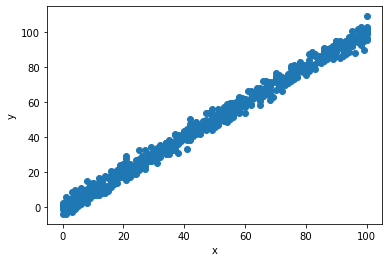

In [16]:
X= np.array(df['x'])
y = np.array(df['y'])
plt.scatter(X,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [17]:
data = np.array(df)
data
data[1,0]

50.0

In [18]:
def SSE(m,b,data):
    totalError=0.0
    totalNan = 0
    for i in range(data.shape[0]):
        if(math.isnan(data[i,0])):
            totalNan +=1
        else:
            yOutput = m*data[i,0]+b
            y = data[i,1]
            error = (y-yOutput)**2
            totalError =totalError+ error
    return totalError

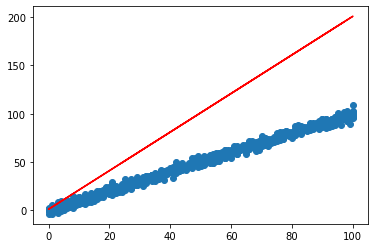

In [19]:
m = 2
b = 1
plt.scatter(X,y)
plt.plot(X,m*X+b,color='red')
plt.show()

In [20]:
sse = SSE(m,b,data)
print('For the fitting line: y = %sx + %s\nSSE: %.2f' %(m,b,sse))

For the fitting line: y = 2x + 1
SSE: 2414343.18


In [21]:
def gradient_descent_step(m,b,data):
    
    n_points = data.shape[0] #size of data
    m_grad = 0
    b_grad = 0
    stepper = 0.0001 #this is the learning rate
    
    for i in range(n_points):

        #Get current pair (x,y)
        x = data[i,0]
        y = data[i,1]
        if(math.isnan(x)|math.isnan(y)): #it will prevent for crashing when some data is missing
            #print("is nan")
            continue
        
        #you will calculate the partical derivative for each value in data
        #Partial derivative respect 'm'
        dm = -((2/n_points) * x * (y - (m*x + b)))
        
        #Partial derivative respect 'b'
        db = - ((2/n_points) * (y - (m*x + b)))
       
        
        #Update gradient
        m_grad = m_grad + dm
        b_grad = b_grad + db
    
 #Set the new 'better' updated 'm' and 'b'   
    m_updated = m - stepper*m_grad
    b_updated = b - stepper*b_grad
    #print('m ', m)
    ##print('steepr*gradient ',stepper*m_grad)
    #print('m_updated', m_updated)
    '''
    Important note: The value '0.0001' that multiplies the 'm_grad' and 'b_grad' is the 'learning rate', but it's a concept
    out of the scope of this challenge. For now, just leave that there and think about it like a 'smoother' of the learn, 
    to prevent overshooting, that is, an extremly fast and uncontrolled learning.
    '''
    
    return m_updated,b_updated

In [22]:
print('Starting line: y = %.2fx + %.2f - Error: %.2f' %(m,b,sse))
for i in range(10000):
    m,b = gradient_descent_step(m,b,data)
    sse = SSE(m,b,data)
    #print('At step %d - Line: y = %.2fx + %.2f - Error: %.2f' %(i+1,m,b,sse))
print('\nBest  line: y = %.2fx + %.2f - Error: %.2f' %(m,b,sse))

Starting line: y = 2.00x + 1.00 - Error: 2414343.18

Best  line: y = 0.99x + 0.55 - Error: 5576.24


m  0.9907470177020995
b  0.5541632669421871


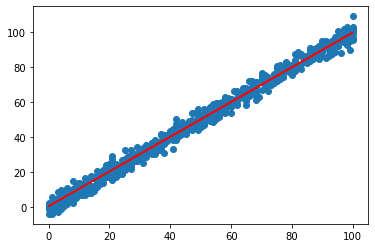

In [23]:
print ('m ', m)
print('b ', b)
plt.scatter(X,y)
plt.plot(X,m*X+b,color='red')
plt.show()

In [24]:
m

0.9907470177020995

In [25]:
b

0.5541632669421871

In [27]:
test.head(10)

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
5,15,9.805235
6,62,58.874659
7,95,97.617937
8,20,18.395127
9,5,8.746748


In [39]:
X_train = df.iloc[:, :-1].values
Y_train = df.iloc[:, -1].values
X_test = test.iloc[:, :-1].values
Y_test = test.iloc[:, -1].values

In [47]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
model = regressor.fit(X_train, Y_train)

In [41]:
y_pred = regressor.predict(X_test)

In [43]:
score = regressor.score(X_test, Y_test)
print(score)

0.9888014444327563


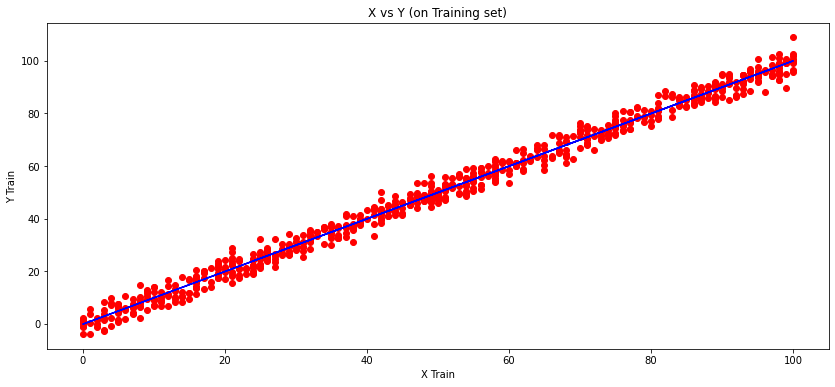

In [44]:
plt.figure(figsize=(14,6))
plt.scatter(X_train, Y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('X vs Y (on Training set)')
plt.xlabel('X Train')
plt.ylabel('Y Train')
plt.show()

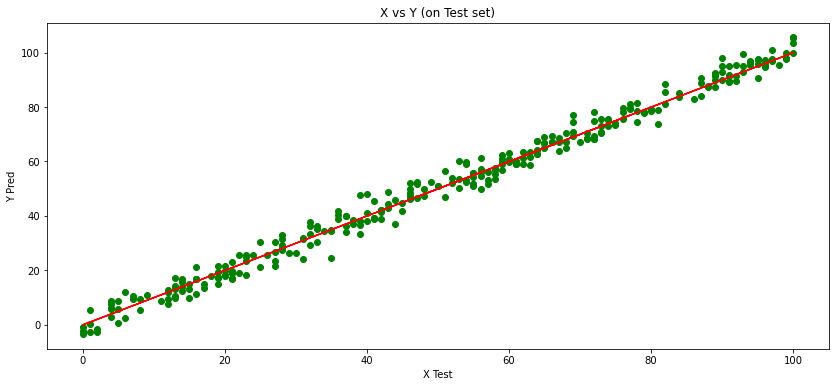

In [45]:
plt.figure(figsize=(14,6))
plt.scatter(X_test, Y_test, color='green')
plt.plot(X_test, y_pred, color='red')
plt.title('X vs Y (on Test set)')
plt.xlabel('X Test')
plt.ylabel('Y Pred')
plt.show()

In [48]:
r_sq = model.score(X_train, Y_train)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.9907015319025518
